In [8]:
# Base import and functions

import imutils
import cv2
from imutils import contours
import os, os.path

from tqdm import tqdm

import pytesseract             # Python interface to tesseract for OCR

import numpy as np
from PIL import Image

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
%%time

excise_src = cv2.imread("data/premasked/IMG_0549.JPG")

CPU times: user 132 ms, sys: 15.2 ms, total: 147 ms
Wall time: 147 ms


### Crop barcode, serial and number

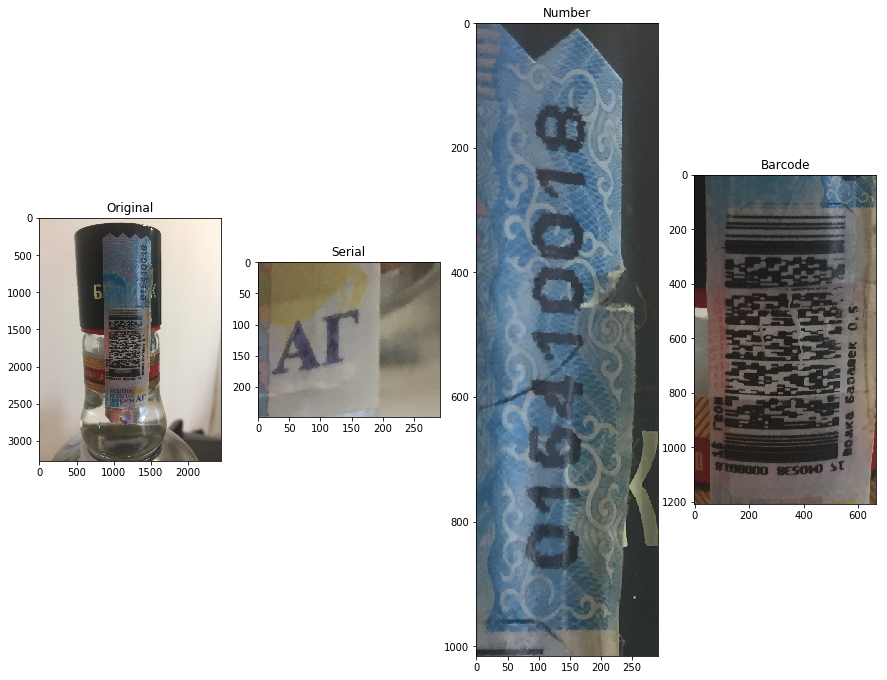

In [5]:
number = excise_src[228:228+1016, 1276:1276+292]
serial = excise_src[2288:2288+248, 1276:1276+292]
# number = excise_src[y:y+h, x:x+w]
barcode = excise_src[1080:1080+1208, 828:828+668]

fig = plt.figure(figsize=(15, 70))

a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(cv2.cvtColor(excise_src, cv2.COLOR_BGR2RGB))
a.set_title('Original')

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(cv2.cvtColor(serial, cv2.COLOR_BGR2RGB))
a.set_title('Serial')

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(cv2.cvtColor(number, cv2.COLOR_BGR2RGB))
a.set_title('Number')

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(cv2.cvtColor(barcode, cv2.COLOR_BGR2RGB))
a.set_title('Barcode')

plt.show()

100%|██████████| 74/74 [00:12<00:00,  5.92it/s]


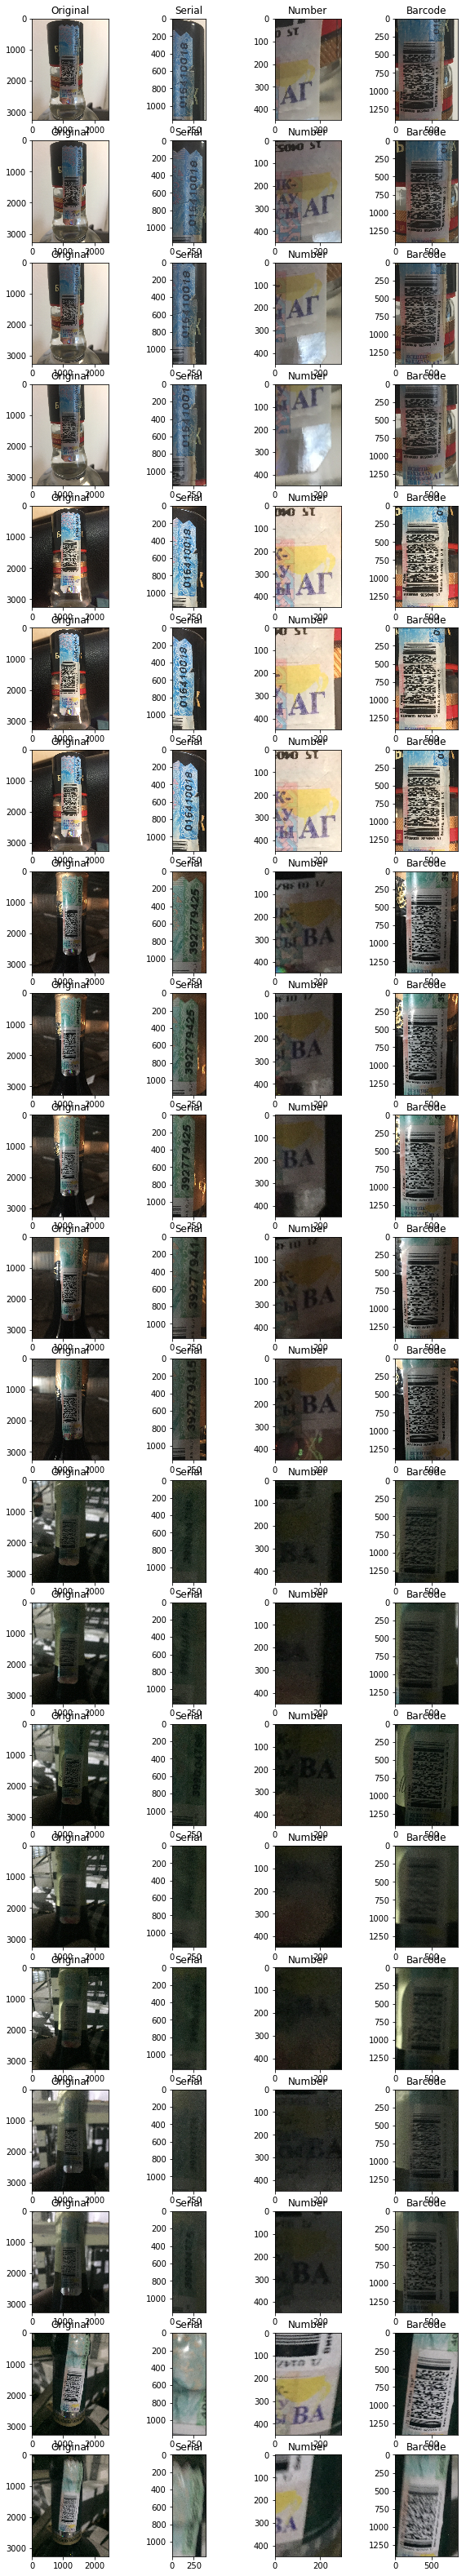

In [20]:
# DIR = 'data/premasked'
DIR = 'test_data/premasked'
filescount = len([name for name in os.listdir(DIR) if (name.endswith(".JPG") or name.endswith(".jpg"))])
current_file_index = 0
fig = plt.figure(figsize=(10, 200))

for filename in tqdm(os.listdir(DIR)):
    if (not (filename.endswith(".JPG") or filename.endswith(".jpg"))) or (current_file_index > 20):
        continue

    input_src = cv2.imread(os.path.join(DIR, filename))

    # crop = src[y:y+h, x:x+w]
    number = input_src[78:78+1166, 1276:1276+392]
    serial = input_src[2088:2088+448, 1276:1276+292]
    barcode = input_src[880:880+1408, 828:828+868]

    a = fig.add_subplot(filescount, 4, 4 * current_file_index + 1)
    imgplot = plt.imshow(cv2.cvtColor(input_src, cv2.COLOR_BGR2RGB))
    a.set_title('Original')

    a = fig.add_subplot(filescount, 4, 4 * current_file_index + 2)
    imgplot = plt.imshow(cv2.cvtColor(number, cv2.COLOR_BGR2RGB))
    a.set_title('Serial')

    a = fig.add_subplot(filescount, 4, 4 * current_file_index + 3)
    imgplot = plt.imshow(cv2.cvtColor(serial, cv2.COLOR_BGR2RGB))
    a.set_title('Number')

    a = fig.add_subplot(filescount, 4, 4 * current_file_index + 4)
    imgplot = plt.imshow(cv2.cvtColor(barcode, cv2.COLOR_BGR2RGB))
    a.set_title('Barcode')
    current_file_index += 1

plt.show()

# As practice shows, the location is not very precise. But we (because of the equal size) can use for its heuristic definition of the contour its absolute dimensions

In [25]:
DIR = 'data/premasked'
OUTPUT_DIR = 'data/premasked/cropped'
filescount = len([name for name in os.listdir(DIR) if (name.endswith(".JPG") or name.endswith(".jpg"))])
current_file_index = 0

for filename in tqdm(os.listdir(DIR)):
    if not (filename.endswith(".JPG") or filename.endswith(".jpg")):
        continue

    input_src = cv2.imread(os.path.join(DIR, filename))

    # crop = src[y:y+h, x:x+w]
    number = input_src[78:78+1166, 1276:1276+392]
    serial = input_src[2088:2088+448, 1276:1276+292]
    barcode = input_src[880:880+1408, 828:828+868]

    cv2.imwrite(os.path.join(OUTPUT_DIR, str(current_file_index).zfill(len(str(filescount))) + '.1.jpg'), number)
    cv2.imwrite(os.path.join(OUTPUT_DIR, str(current_file_index).zfill(len(str(filescount))) + '.2.jpg'), serial)
    cv2.imwrite(os.path.join(OUTPUT_DIR, str(current_file_index).zfill(len(str(filescount))) + '.3.jpg'), barcode)
    current_file_index += 1

100%|██████████| 264/264 [00:53<00:00,  5.09it/s]


### Finetuning

100%|██████████| 264/264 [00:13<00:00, 18.86it/s] 


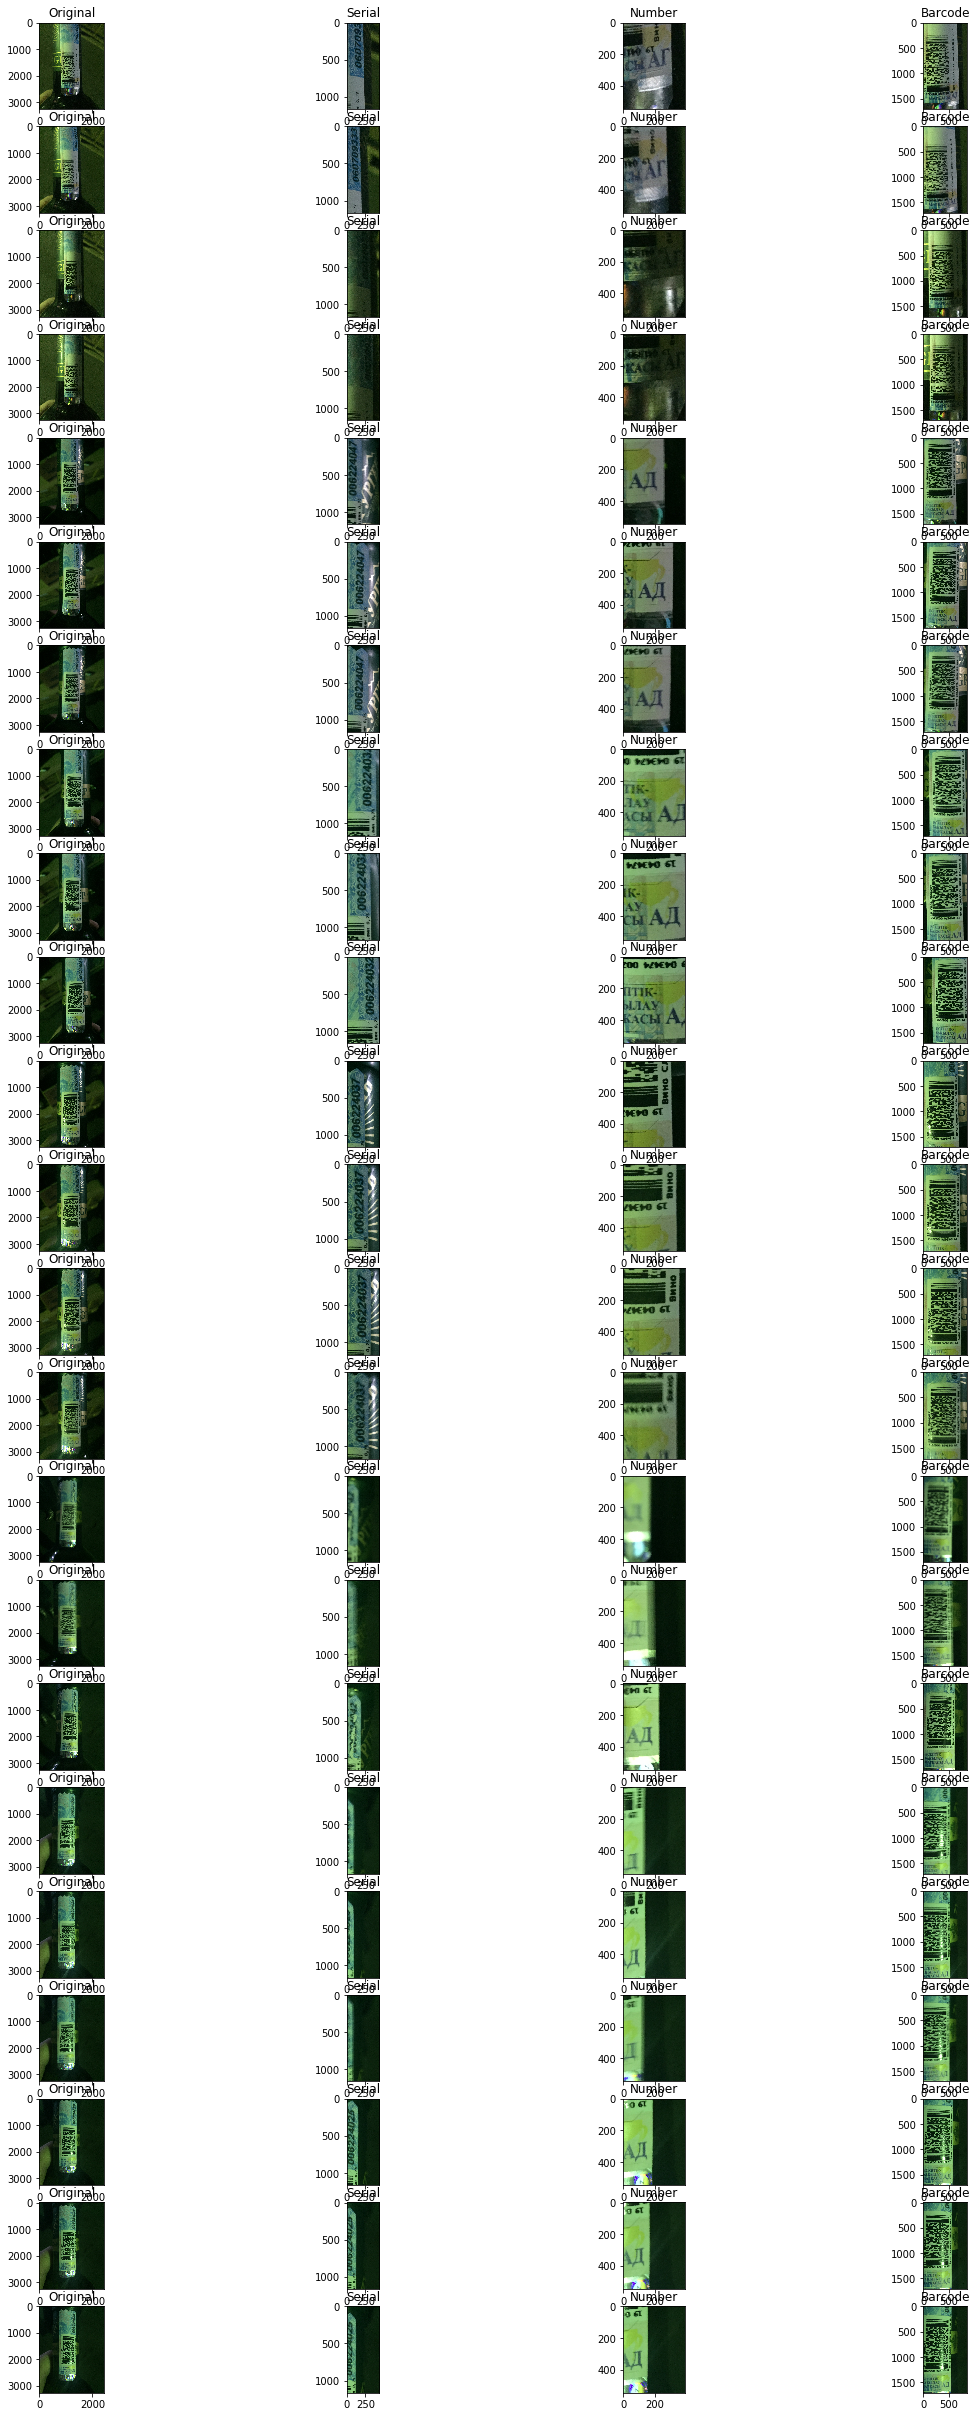

In [32]:
DIR = 'data/premasked'
filescount = len([name for name in os.listdir(DIR) if (name.endswith(".JPG") or name.endswith(".jpg"))])
current_file_index = 0
fig = plt.figure(figsize=(20, 500))

for filename in tqdm(os.listdir(DIR)):
    if (not (filename.endswith(".JPG") or filename.endswith(".jpg"))) or (current_file_index > 222) or (current_file_index < 200):
        current_file_index += 1
        continue

    input_src = cv2.imread(os.path.join(DIR, filename))

    # crop = src[y:y+h, x:x+w]
    number = input_src[78:78+1166, 1276:1276+432]
    serial = input_src[2088:2088+548, 1226:1226+392]
    barcode = input_src[880:880+1708, 828:828+868]

    a = fig.add_subplot(filescount, 4, 4 * current_file_index + 1)
    imgplot = plt.imshow(cv2.cvtColor(input_src, cv2.COLOR_BGR2RGB))
    a.set_title('Original')

    a = fig.add_subplot(filescount, 4, 4 * current_file_index + 2)
    imgplot = plt.imshow(cv2.cvtColor(number, cv2.COLOR_BGR2RGB))
    a.set_title('Serial')

    a = fig.add_subplot(filescount, 4, 4 * current_file_index + 3)
    imgplot = plt.imshow(cv2.cvtColor(serial, cv2.COLOR_BGR2RGB))
    a.set_title('Number')

    a = fig.add_subplot(filescount, 4, 4 * current_file_index + 4)
    imgplot = plt.imshow(cv2.cvtColor(barcode, cv2.COLOR_BGR2RGB))
    a.set_title('Barcode')
    current_file_index += 1

plt.show()